In [ ]:
!conda create -n skinlesion python=3.8
!conda activate skinlesion  # activate the environment and install all dependencies
!cd FairDisCo/
!conda install pytorch==1.11.0 torchvision==0.12.0 torchaudio==0.11.0 cudatoolkit=11.3 -c pytorch
# or go to https://pytorch.org/get-started/previous-versions/ to find a right command to install pytorch

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
/bin/bash: line 1: cd: FairDisCo/: No such file or directory
/bin/bash: line 1: conda: command not found


In [ ]:
!pip install scikit-image==0.18.3 pandas==1.3.4 tensorboard==2.6.0 scikit-learn==1.0.1 numpy==1.22.3
# scikit-learn == 1.0.1
# numpy == 1.22.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 19.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 58.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 89.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for outpu

In [ ]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import os
from PIL import Image
import numpy as np
import seaborn as sns

In [ ]:
import pandas as pd # Make sure pandas is imported

csv_file = '/content/drive/MyDrive/Internship/fitzpatrick17k.csv' # Define the CSV file path
df = pd.read_csv(csv_file) # Read the CSV file into a DataFrame called 'df'
df.head() # Now you can call df.head()

Unnamed: 0                           md5hash  fitzpatrick_scale  \
0           0  5e82a45bc5d78bd24ae9202d194423f8                  3   
1           1  fa2911a9b13b6f8af79cb700937cc14f                  1   
2           2  d2bac3c9e4499032ca8e9b07c7d3bc40                  2   
3           3  0a94359e7eaacd7178e06b2823777789                  1   
4           4  a39ec3b1f22c08a421fa20535e037bba                  1   

   fitzpatrick_centaur                            label nine_partition_label  \
0                    3  drug induced pigmentary changes         inflammatory   
1                    1                  photodermatoses         inflammatory   
2                    3                   dermatofibroma        benign dermal   
3                    1                        psoriasis         inflammatory   
4                    1                        psoriasis         inflammatory   

  three_partition_label   qc  \
0        non-neoplastic  NaN   
1        non-neoplastic  NaN   
2                benign  NaN   
3        non-neoplastic  NaN   
4        non-neoplastic  NaN   

                                                 url  \
0  https://www.dermaamin.com/site/images/clinical...   
1  https://www.dermaamin.com/site/images/clinical...   
2  https://www.dermaamin.com/site/images/clinical...   
3  https://www.dermaamin.com/site/images/clinical...   
4  https://www.dermaamin.com/site/images/clinical...   

                                        url_alphanum  
0  httpwwwdermaamincomsiteimagesclinicalpicmminoc...  
1  httpwwwdermaamincomsiteimagesclinicalpicpphoto...  
2  httpwwwdermaamincomsiteimagesclinicalpicdderma...  
3  httpwwwdermaamincomsiteimagesclinicalpicppsori...  
4  httpwwwdermaamincomsiteimagesclinicalpicppsori...

In [ ]:
df

Unnamed: 0                           md5hash  fitzpatrick_scale  \
0               0  5e82a45bc5d78bd24ae9202d194423f8                  3   
1               1  fa2911a9b13b6f8af79cb700937cc14f                  1   
2               2  d2bac3c9e4499032ca8e9b07c7d3bc40                  2   
3               3  0a94359e7eaacd7178e06b2823777789                  1   
4               4  a39ec3b1f22c08a421fa20535e037bba                  1   
...           ...                               ...                ...   
16572       16572  cd90e491ddaa92f0f4eb07f73aa09f64                  5   
16573       16573  5f1ed6de6a9110d7dc580a6a0312af63                  4   
16574       16574  f198aaf1f0550c2464b285454d34926e                  3   
16575       16575  6214de2e915835014235a1839cbc5938                 -1   
16576       16576  5a3a4c1f0effb626b298e89c032b1d28                  2   

       fitzpatrick_centaur                            label  \
0                        3  drug induced pigmentary changes   
1                        1                  photodermatoses   
2                        3                   dermatofibroma   
3                        1                        psoriasis   
4                        1                        psoriasis   
...                    ...                              ...   
16572                    5                      scleroderma   
16573                    5                 pityriasis rosea   
16574                    3                          myiasis   
16575                    5                         vitiligo   
16576                    2                  dariers disease   

      nine_partition_label three_partition_label   qc  \
0             inflammatory        non-neoplastic  NaN   
1             inflammatory        non-neoplastic  NaN   
2            benign dermal                benign  NaN   
3             inflammatory        non-neoplastic  NaN   
4             inflammatory        non-neoplastic  NaN   
...                    ...                   ...  ...   
16572         inflammatory        non-neoplastic  NaN   
16573         inflammatory        non-neoplastic  NaN   
16574         inflammatory        non-neoplastic  NaN   
16575         inflammatory        non-neoplastic  NaN   
16576       genodermatoses        non-neoplastic  NaN   

                                                     url  \
0      https://www.dermaamin.com/site/images/clinical...   
1      https://www.dermaamin.com/site/images/clinical...   
2      https://www.dermaamin.com/site/images/clinical...   
3      https://www.dermaamin.com/site/images/clinical...   
4      https://www.dermaamin.com/site/images/clinical...   
...                                                  ...   
16572  http://atlasdermatologico.com.br/img?imageId=4529   
16573  http://atlasdermatologico.com.br/img?imageId=5630   
16574  http://atlasdermatologico.com.br/img?imageId=4609   
16575  http://atlasdermatologico.com.br/img?imageId=7930   
16576  http://atlasdermatologico.com.br/img?imageId=1327   

                                            url_alphanum  
0      httpwwwdermaamincomsiteimagesclinicalpicmminoc...  
1      httpwwwdermaamincomsiteimagesclinicalpicpphoto...  
2      httpwwwdermaamincomsiteimagesclinicalpicdderma...  
3      httpwwwdermaamincomsiteimagesclinicalpicppsori...  
4      httpwwwdermaamincomsiteimagesclinicalpicppsori...  
...                                                  ...  
16572   httpwwwatlasdermatologicocombrimgimageId4529.jpg  
16573   httpwwwatlasdermatologicocombrimgimageId5630.jpg  
16574   httpwwwatlasdermatologicocombrimgimageId4609.jpg  
16575   httpwwwatlasdermatologicocombrimgimageId7930.jpg  
16576   httpwwwatlasdermatologicocombrimgimageId1327.jpg  

[16577 rows x 10 columns]

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/128G6n4oCLcGhbALF0BIkjrRJwZnF5GXzP1PaleVzBpE#gid=0


In [ ]:
csv_file = '/content/drive/MyDrive/Internship/fitzpatrick17k.csv'#'fitzpatrick17k.csv'
df = pd.read_csv(csv_file)
fig_folder = 'Figures/'

In [ ]:
df.columns

Index(['Unnamed: 0', 'md5hash', 'fitzpatrick_scale', 'fitzpatrick_centaur',
       'label', 'nine_partition_label', 'three_partition_label', 'qc', 'url',
       'url_alphanum'],
      dtype='object')

In [ ]:
# drop unknown skin type
df_known = df.loc[df['fitzpatrick_centaur'] != -1]

In [ ]:
df_known['fitzpatrick_centaur'].unique()

array([3, 1, 5, 2, 4, 6])

In [ ]:
# encode disease names to numbers
df["low"] = df['label'].astype('category').cat.codes
df["mid"] = df['nine_partition_label'].astype('category').cat.codes
df["high"] = df['three_partition_label'].astype('category').cat.codes
df["hasher"] = df["md5hash"]

In [ ]:
new_path = 'fitapatrick17k_known_code.csv'
df_known.to_csv(new_path, index=False)

In [ ]:
code_df = pd.read_csv('fitapatrick17k_known_code.csv')

In [ ]:
'''
calculate weights for each skin type and condition
method 1 reweighting
'''
level = 'high'
code_df = pd.merge(code_df, df[['md5hash', 'low', 'mid', 'high']], on='md5hash', how='left')
total = code_df['fitzpatrick_centaur'].count()  # total samples
type_count = code_df['fitzpatrick_centaur'].value_counts().sort_index()
condition_count = code_df[level].value_counts().sort_index()
print(total)
print(type_count)
print(type_count[1])
print(condition_count)
weight_record = np.zeros((7, 3))
num_record = np.zeros((7, 3))
for i in range(1, 7): # skin type
    for j in range(len(condition_count)): # skin condition
        x = code_df.loc[(code_df['fitzpatrick_centaur']==i) & (code_df[level]==j)]
        num_record[i, j] = len(x)
        # print('joint num', len(x))
        weight = type_count[i]*condition_count[j]/(len(x)*total)
        # print('weight', weight)
        weight_record[i, j] = weight
print(weight_record)
print(num_record)
# add weights to the csv file
weight_list = []  # weight for each sample in the code_df
for k in range(total):
    row_data = code_df.iloc[k]
    # print(row_data)
    weight_list.append(weight_record[int(row_data['fitzpatrick_centaur']), int(row_data[level])])
    # print(weight_list)
print(len(weight_list))
code_df['REWT_weights'] = weight_list

15504
fitzpatrick_centaur
1    5561
2    3180
3    2934
4    1974
5    1293
6     562
Name: count, dtype: int64
5561
high
0     2013
1     2098
2    11393
Name: count, dtype: int64
[[0.         0.         0.        ]
 [0.84152229 0.91213826 1.05375447]
 [1.1342943  0.74449366 1.04414635]
 [0.91572863 1.09676419 1.0000131 ]
 [1.17568417 1.29044211 0.9364618 ]
 [1.33237966 2.16010683 0.87490931]
 [2.35382752 1.68999541 0.84975628]]
[[   0.    0.    0.]
 [ 858.  825. 3878.]
 [ 364.  578. 2238.]
 [ 416.  362. 2156.]
 [ 218.  207. 1549.]
 [ 126.   81. 1086.]
 [  31.   45.  486.]]
15504


In [ ]:
code_df.to_csv('fitzpatrick17k_known_code.csv', index=False)

In [ ]:
'''
calculate weights for each skin type and condition
method 2 resampling   weight=1/num
'''
level = 'high'
total = code_df['fitzpatrick_centaur'].count()  # total samples
type_count = code_df['fitzpatrick_centaur'].value_counts().sort_index()
condition_count = code_df[level].value_counts().sort_index()
weight_record = np.zeros((7, 3))
num_record = np.zeros((7, 3))
for i in range(1, 7): # skin type
    for j in range(len(condition_count)): # skin condition
        x = code_df.loc[(code_df['fitzpatrick_centaur']==i) & (code_df[level]==j)]
        num_record[i, j] = len(x)
        # print('joint num', len(x))
        weight = 1/len(x)
        # print('weight', weight)
        weight_record[i, j] = weight
# print(num_record)
print(weight_record)
# add weights to the csv file
weight_list = []  # weight for each sample in the code_df
for k in range(total):
    row_data = code_df.iloc[k]
    # print(row_data)
    weight_list.append(weight_record[int(row_data['fitzpatrick_centaur']), int(row_data[level])])
    # print(weight_list)
print(len(weight_list))
code_df['RESM_weights'] = weight_list

[[0.         0.         0.        ]
 [0.0011655  0.00121212 0.00025786]
 [0.00274725 0.0017301  0.00044683]
 [0.00240385 0.00276243 0.00046382]
 [0.00458716 0.00483092 0.00064558]
 [0.00793651 0.01234568 0.00092081]
 [0.03225806 0.02222222 0.00205761]]
15504


In [ ]:
code_df.to_csv('fitzpatrick17k_known_code.csv', index=False)

In [ ]:
# connect class number and class name
connection = {}
name_list = {'low':'label', 'mid':'nine_partition_label', 'high':'three_partition_label'}
connection['low'] = [0]*114
connection['mid'] = [0]*9
connection['high'] = [0]*3
for label in ['low', 'mid', 'high']:
    for i in range(len(connection[label])):
        capture = code_df.loc[code_df[label]==i].iloc[0][name_list[label]]
        connection[label][i] = capture
print(connection)

{'low': ['acanthosis nigricans', 'acne', 'acne vulgaris', 'acquired autoimmune bullous diseaseherpes gestationis', 'acrodermatitis enteropathica', 'actinic keratosis', 'allergic contact dermatitis', 'aplasia cutis', 'basal cell carcinoma', 'basal cell carcinoma morpheiform', 'becker nevus', 'behcets disease', 'calcinosis cutis', 'cheilitis', 'congenital nevus', 'dariers disease', 'dermatofibroma', 'dermatomyositis', 'disseminated actinic porokeratosis', 'drug eruption', 'drug induced pigmentary changes', 'dyshidrotic eczema', 'eczema', 'ehlers danlos syndrome', 'epidermal nevus', 'epidermolysis bullosa', 'erythema annulare centrifigum', 'erythema elevatum diutinum', 'erythema multiforme', 'erythema nodosum', 'factitial dermatitis', 'fixed eruptions', 'folliculitis', 'fordyce spots', 'granuloma annulare', 'granuloma pyogenic', 'hailey hailey disease', 'halo nevus', 'hidradenitis', 'ichthyosis vulgaris', 'incontinentia pigmenti', 'juvenile xanthogranuloma', 'kaposi sarcoma', 'keloid', 'k

In [ ]:
'''
Look into Derm/Atla
'''
derm = code_df.loc[code_df.url.str.contains("dermaamin")==False]
value_counts = derm['low'].value_counts()
value_counts = value_counts.rename_axis('unique_values').reset_index(name='counts')
print(value_counts)
final_set = set((value_counts.loc[value_counts['counts']>1])['unique_values'])
print(len(final_set))

    unique_values  counts
0               8     253
1              48     209
2              98     181
3              80     173
4              81     127
..            ...     ...
87             59       2
88             74       2
89             72       2
90             24       2
91             53       1

[92 rows x 2 columns]
91


fitzpatrick_centaur
1    5230
2    2642
3    1788
4    1108
5     736
6     354
Name: count, dtype: int64


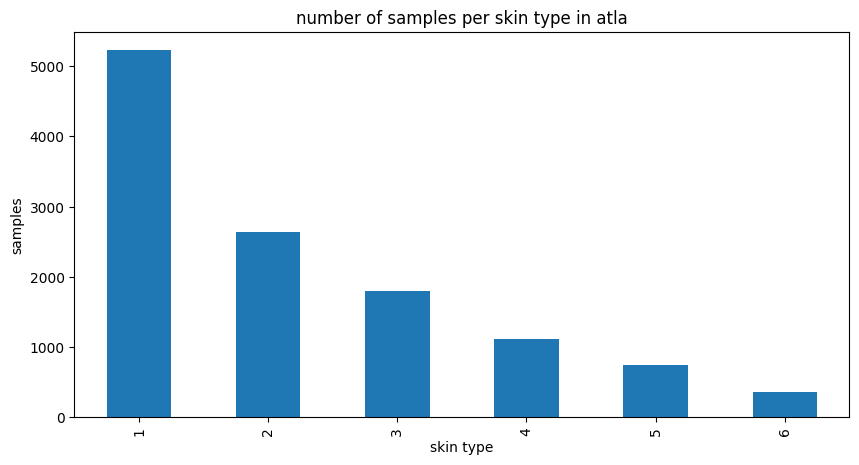

In [ ]:
'''
Visualize data distribution
'''
plt.figure(figsize=(10,5))
type = code_df['fitzpatrick_centaur']
# for derm
derm = code_df.loc[code_df.url.str.contains("dermaamin")==True]
type = derm['fitzpatrick_centaur']
print(type.value_counts())
type.value_counts().sort_index().plot.bar()
plt.xlabel('skin type')
plt.ylabel('samples')
plt.title('number of samples per skin type in atla')
# plt.savefig(fig_folder+'skin_type_statistics.jpg')
plt.show()

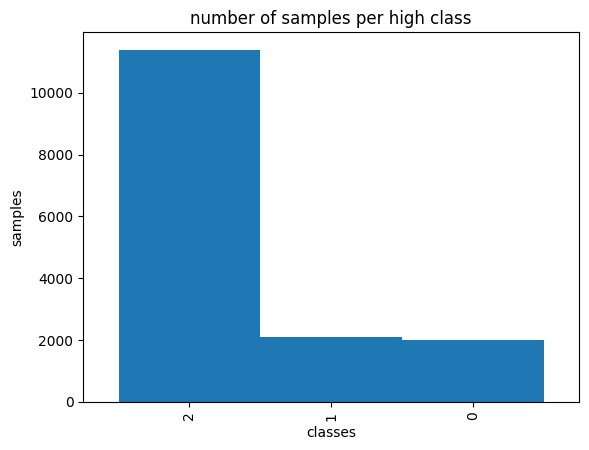

In [ ]:
import os
'''
Visualize Skin type distribution
'''
# count number of samples for each skin condition
# plt.figure(figsize=(25, 5), dpi=200)
plt.figure()
phase = 'high'
label = code_df[phase]
label.value_counts().plot.bar(width=1)
# plt.hist(count_condition.values, bins=200)
# plt.title('Histogram age_approx counts in train')
plt.xlabel('classes')
plt.ylabel('samples')
# plt.xticks([])
plt.title('number of samples per {} class'.format(phase))
os.makedirs(fig_folder, exist_ok=True)
plt.savefig(fig_folder+'{}_class_statistics.jpg'.format(phase))
plt.show()
# print(count_condition)

acrodermatitis enteropathica
number of samples 91


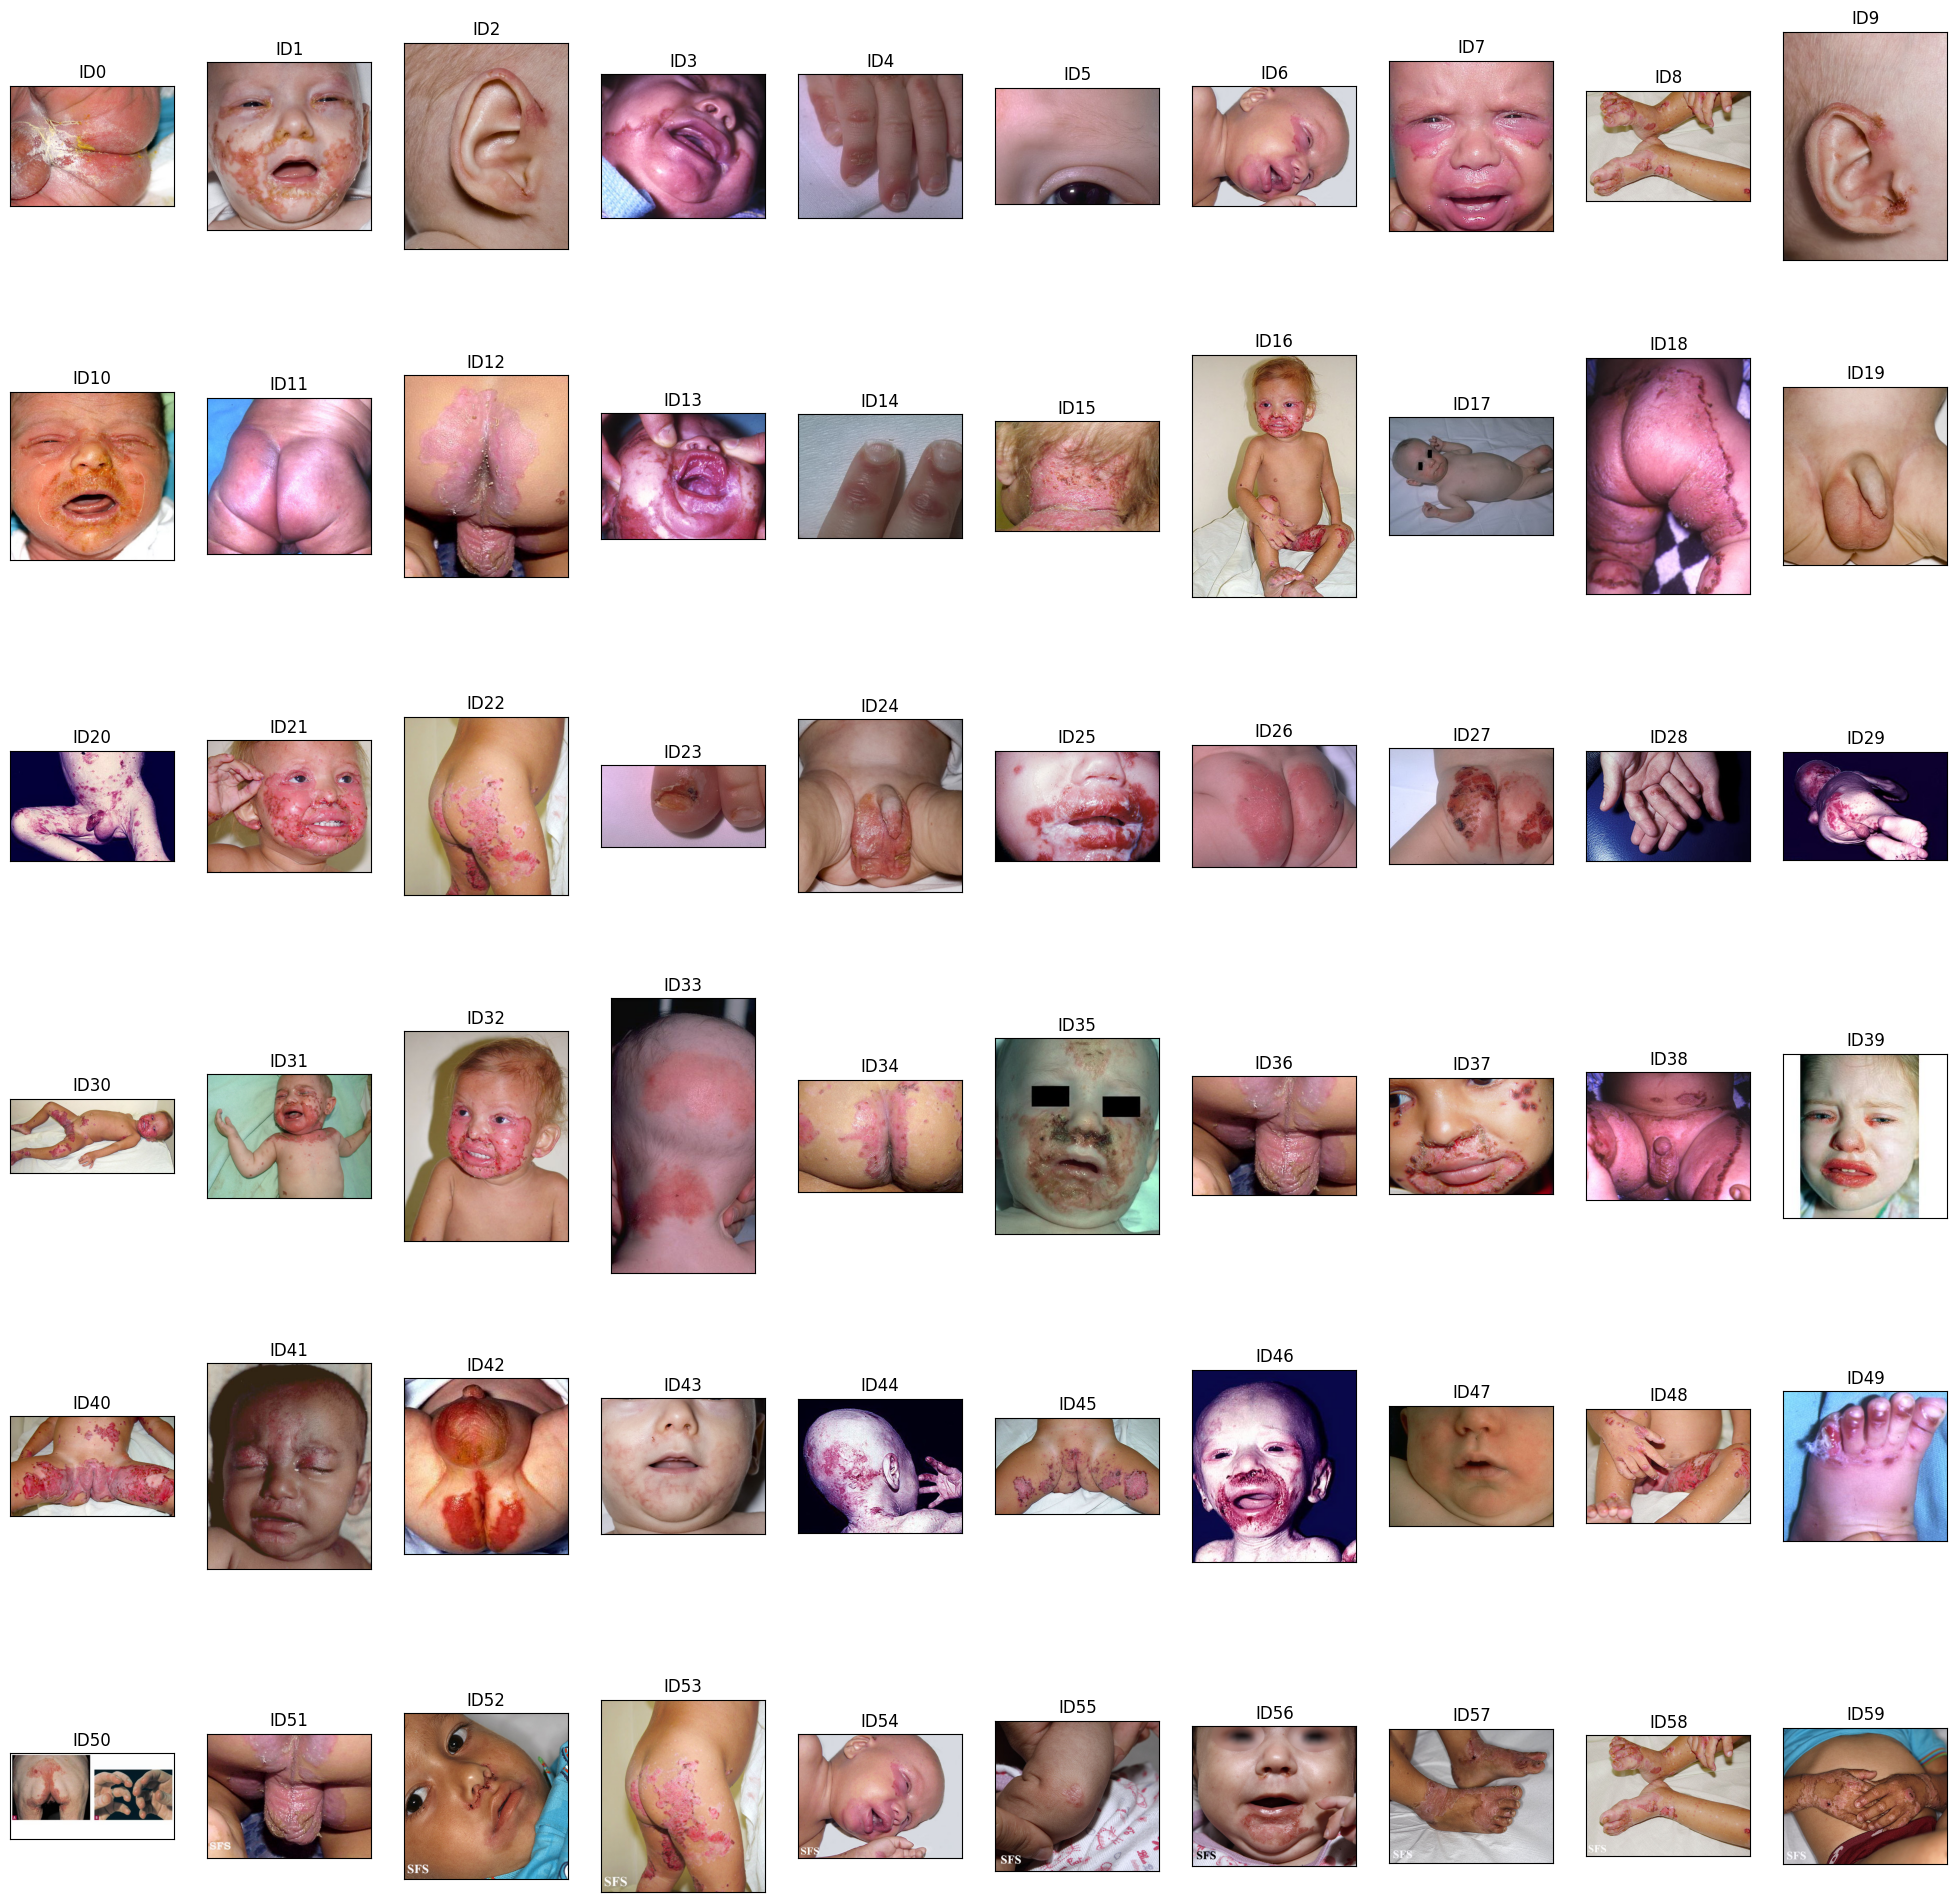

In [ ]:
'''
Visualize some images of one class
'''
img_folder = '/content/drive/MyDrive/Internship/fitzpatrick17k/data/finalfitz17k/'
group_condition = list(code_df.groupby('label'))
fig = plt.figure(figsize=(25,25))
want_label = 4
get_index = -1
for i in range(len(group_condition)):
    if group_condition[i][1].iloc[0]['low'] == want_label:
        get_index = i
data = group_condition[get_index][1]
print(group_condition[get_index][0])
print('number of samples', data.shape[0])
for i in range(1, 61):
    fig.add_subplot(6, 10, i)
    img_name = img_folder+data.iloc[i]['md5hash']+'.jpg'
    img = Image.open(img_name)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title('ID'+str(i-1))

plt.pause(0.001)
plt.show()

[[   0.    0.    0.]
 [ 858.  825. 3878.]
 [ 364.  578. 2238.]
 [ 416.  362. 2156.]
 [ 218.  207. 1549.]
 [ 126.   81. 1086.]
 [  31.   45.  486.]
 [   0.    0.    0.]]
[ 2013.  2098. 11393.]
[   0. 5561. 3180. 2934. 1974. 1293.  562.    0.]
15504.0


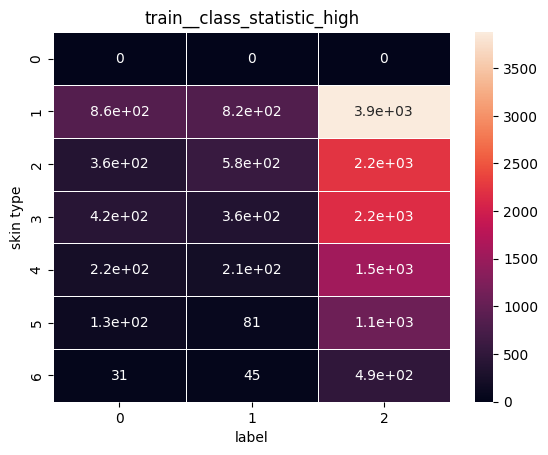

In [ ]:
'''get number of samples per skin type per class  with unknown type
'''
np.set_printoptions(suppress=True)
label = 'high'
# fig_folder = 'figures/'
df = pd.read_csv('fitzpatrick17k_known_code.csv')
whole = np.zeros((8, len(df[label].unique())))  # whole samples

for i in range(df.shape[0]):
    row = df.iloc[i]
    type = int(row['fitzpatrick_centaur']) if row['fitzpatrick_centaur'] > 0 else 0  # set type -1 as 0
    whole[type, row[label]] += 1

print(whole)
print(np.sum(whole, axis=0))
print(np.sum(whole, axis=1))
print(np.sum(whole))
# calculate row 7. sum row 0-6
# whole[7, :] = np.sum(whole[0:7, :], axis=0)

# plot
# plt.figure(figsize=(100,8), dpi=200)
# sns.heatmap(record_array[0:7, :], annot=True, fmt=".2g", linewidths=.5)
sns.heatmap(whole[0:7, :], annot=True, fmt=".2g", linewidths=.5)
plt.xlabel('label')
plt.ylabel('skin type')
name = 'train__class_statistic_{}'.format(label)
plt.title(name)
# plt.savefig(fig_folder+name+'.jpg')
plt.show()

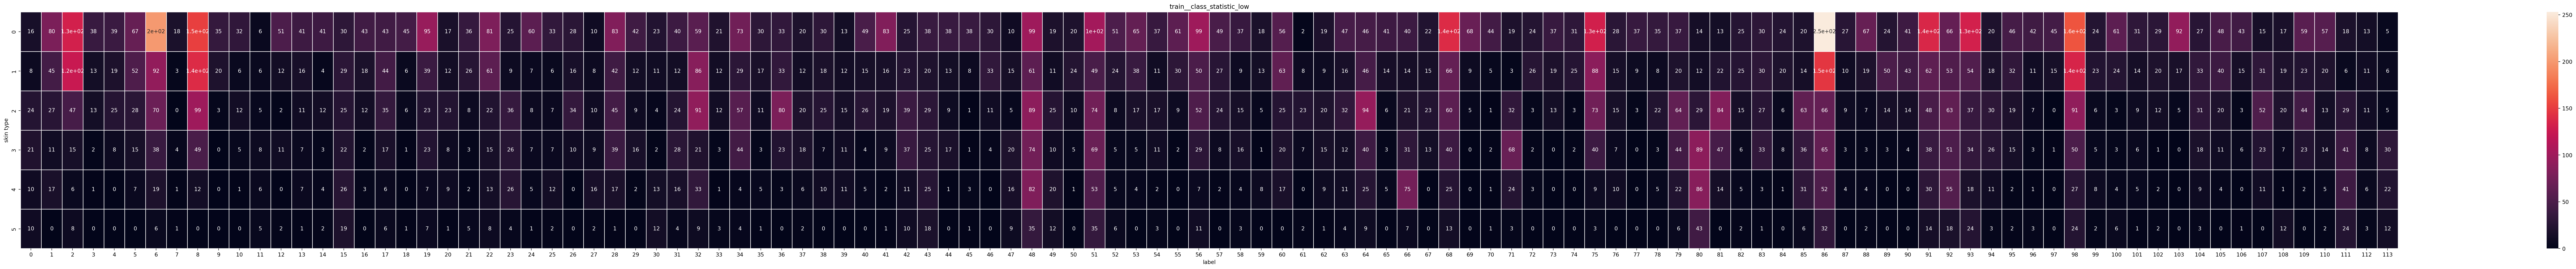

In [ ]:
'''get number of samples per skin type per class  out  unknown type
'''
np.set_printoptions(suppress=True)
label = 'low'
# fig_folder = 'figures/'
df = pd.read_csv('fitzpatrick17k_known_code.csv')
whole = np.zeros((8, len(df[label].unique())))  # whole samples

for i in range(df.shape[0]):
    row = df.iloc[i]
    type = int(row['fitzpatrick_centaur'])
    whole[type, row[label]] += 1

# calculate row 7. sum row 0-6
whole[7, :] = np.sum(whole[0:7, :], axis=0)

# plot
plt.figure(figsize=(100,8), dpi=200)
# sns.heatmap(record_array[0:7, :], annot=True, fmt=".2g", linewidths=.5)
sns.heatmap(whole[1:7, :], annot=True, fmt=".2g", linewidths=.5)
plt.xlabel('label')
plt.ylabel('skin type')
name = 'train__class_statistic_{}'.format(label)
plt.title(name)
# plt.savefig(fig_folder+name+'.jpg')
plt.show()

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Internship')
import Models

Training

In [ ]:
import os
os.symlink("//content/drive/MyDrive/Internship/fitzpatrick17k/data/finalfitz17k", "/content/fitzpatrick17k")

In [ ]:
'''
Based on https://github.com/microsoft/vscode/issues/125993
only use known skin type
train dissentangle network
python -u train_DisCo.py 20 full fitzpatrick DisCo
python -u train_DisCo.py 15 full ddi DisCo
'''
from __future__ import print_function, division
from sklearn.decomposition import TruncatedSVD
import torch
from torchvision import transforms, models
import pandas as pd
import numpy as np
import os
import skimage
from skimage import io
import warnings
import torch.nn as nn
import torch.optim as optim
from torch.utils.data.sampler import WeightedRandomSampler
from torch.optim import lr_scheduler
import time
import copy
import sys
import cv2
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import balanced_accuracy_score
# from torch.utils.tensorboard import SummaryWriter
from torch.utils.tensorboard import SummaryWriter
# get model
from Models.models_losses import Network, Confusion_Loss, Supervised_Contrastive_Loss

warnings.filterwarnings("ignore")

from Models.models_losses import Supervised_Contrastive_Loss # Make sure to import it

class Supervised_Contrastive_Loss(nn.Module):
    def __init__(self, temperature=0.1):
        super(Supervised_Contrastive_Loss, self).__init__()
        self.temperature = temperature

    def forward(self, projections, targets, attribute):
        """
        projections: (batch_size, projection_dim)
        targets: (batch_size)
        attribute: (batch_size)
        """
        device = projections.device  # Get the device of the projections tensor
        # print('device', device)

        projections = nn.functional.normalize(projections, dim=1)
        # print(projections.shape)

        dot_product_tempered = torch.div(torch.matmul(projections, projections.T), self.temperature).to(device) # Move this to device
        # print(dot_product_tempered.shape)
        # print('dot_product_tempered', dot_product_tempered.device)
        # mask similar class: both condition and type are the same
        mask_similar_class = torch.eq(targets.unsqueeze(1), targets.unsqueeze(0)).type(torch.float32).to(device)  # Move this to device
        # print(mask_similar_class.shape)
        mask_similar_attribute = torch.eq(attribute.unsqueeze(1), attribute.unsqueeze(0)).type(torch.float32).to(device) # Move this to device
        # print(mask_similar_attribute.shape)
        # mask nonsimilar class: condition are different
        mask_nonsimilar_class = torch.eq(targets.unsqueeze(1), targets.unsqueeze(0)).type(torch.float32).to(device) # Move this to device
        # print(mask_nonsimilar_class.shape)
        mask_nonsimilar_class = 1- mask_nonsimilar_class #.type(torch.float32)
        mask_combined = (mask_similar_class*mask_similar_attribute).type(torch.float32).to(device) # Move this to device

        cardinality_per_samples = torch.sum(mask_combined, dim=1).to(device) # Move this to device
        # print(cardinality_per_samples.shape)
        # print('cardinality_per_samples', cardinality_per_samples.device)

        exp_dot_tempered = torch.exp(dot_product_tempered-torch.max(dot_product_tempered, dim=1, keepdim=True)[0]).to(device)  # Move this to device
        # print(exp_dot_tempered.shape)
        # print('exp_dot_tempered', exp_dot_tempered.device)

        if torch.sum(cardinality_per_samples) == 0:
            supervised_contrastive_loss = torch.tensor(0.0, requires_grad=True).to(device)  # Move this to device
        else:
            log_prob = -torch.log(exp_dot_tempered / (torch.sum(exp_dot_tempered * mask_nonsimilar_class, dim=1, keepdim=True)+exp_dot_tempered+1e-5))
        supervised_contrastive_loss = torch.sum(log_prob * mask_combined)/(torch.sum(cardinality_per_samples)+1e-5)
        return supervised_contrastive_loss

def flatten(list_of_lists):
    if len(list_of_lists) == 0:
        return list_of_lists
    if isinstance(list_of_lists[0], list):
        return flatten(list_of_lists[0]) + flatten(list_of_lists[1:])
    return list_of_lists[:1] + flatten(list_of_lists[1:])


def train_model(label, dataloaders, device, dataset_sizes, model,
                criterion, optimizer, scheduler, num_epochs=2, alpha=1.0, beta=0.8):
    print('hyper-parameters alpha: {}  beta: {}'.format(alpha, beta))
    since = time.time()
    training_results = []
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_loss = 0.0
    train_step = 0 # for tensorboard
    leading_epoch = 0  # record best model epoch

    criterion0 = nn.CrossEntropyLoss()  # For condition prediction
    criterion1 = Confusion_Loss()      # For branch 2 confusion loss
    criterion2 = nn.CrossEntropyLoss()  # For branch 2 ce loss
    criterion3 = Supervised_Contrastive_Loss()  # For supervised contrastive loss



    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                scheduler.step()
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0.0
            running_balanced_acc_sum = 0.0
            # running_total = 0
            print(phase)
            # Iterate over data.
            for n_iter, batch in enumerate(dataloaders[phase]):
                inputs = batch["image"].to(device)
                # note!!! skin type starts from 1, so subtract 1
                label_c, label_t = batch[label], batch['fitzpatrick_centaur']-1 # label_condition, label_type
                # weights = batch['weight'].to(device)
                label_c, label_t = torch.from_numpy(np.asarray(label_c)).to(device), torch.from_numpy(np.asarray(label_t)).to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    inputs = inputs.float()  # ADDED AS A FIX
                    output = model(inputs)
                    _, preds = torch.max(output[0], 1)  # branch 1 get condition prediction
                    loss0 = criterion[0](output[0], label_c)
                    # loss0_batch = criterion[0](output[0], label_c)  # branch 1 ce loss
                    # loss0 = torch.mean(loss0_batch*weights)
                    loss1 = criterion[1](output[1], label_t)  # branch 2 confusion loss
                    loss2 = criterion[2](output[2], label_t)  # branch 2 ce loss
                    loss3 = criterion[3](output[3], label_c, label_t)  # supervised contrastive loss
                    loss = loss0+loss1*alpha+loss2+loss3*beta
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                    # statistics
                # tensorboard
                if phase == 'train':
                    writer.add_scalar('Loss/'+phase, loss.item(), train_step)
                    writer.add_scalar('Loss/'+phase+'loss0', loss0.item(), train_step)
                    writer.add_scalar('Loss/'+phase+'loss1_conf', loss1.item(), train_step)
                    writer.add_scalar('Loss/'+phase+'loss2', loss2.item(), train_step)
                    writer.add_scalar('Loss/'+phase+'contrast_loss', loss3.item(), train_step)
                    writer.add_scalar('Accuracy/'+phase, (torch.sum(preds == label_c.data)).item()/inputs.size(0), train_step)
                    writer.add_scalar('Balanced-Accuracy/'+phase, balanced_accuracy_score(label_c.data.cpu(), preds.cpu()), train_step)
                    train_step += 1
                # -------------------------
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == label_c.data)
                running_balanced_acc_sum += balanced_accuracy_score(label_c.data.cpu(), preds.cpu())*inputs.size(0)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            epoch_balanced_acc = running_balanced_acc_sum / dataset_sizes[phase]
            # print("Loss: {}/{}".format(running_loss, dataset_sizes[phase]))
            print("Accuracy: {}/{}".format(running_corrects,
                                           dataset_sizes[phase]))
            print('{} Loss: {:.4f} Acc: {:.4f} Balanced-Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc, epoch_balanced_acc))
            # tensorboard
            writer.add_scalar('lr/'+phase, scheduler.get_last_lr()[0], epoch)
            if phase == 'val':
                writer.add_scalar('Loss/'+phase, epoch_loss, epoch)
                writer.add_scalar('Accuracy/'+phase, epoch_acc, epoch)
                writer.add_scalar('Balanced-Accuracy/'+phase, epoch_balanced_acc, epoch)
            # ---------------------
            training_results.append([phase, epoch, epoch_loss, epoch_acc.item(), epoch_balanced_acc])
            if epoch > 0:
                if phase == 'val' and epoch_acc > best_acc:
                    print("New leading accuracy: {}".format(epoch_acc))
                    best_acc = epoch_acc
                    leading_epoch = epoch
                    best_model_wts = copy.deepcopy(model.state_dict())
                # use balanced acc
                # if phase == 'val' and epoch_balanced_acc > best_acc:
                #     print("New leading balanced accuracy: {}".format(epoch_balanced_acc))
                #     best_acc = epoch_balanced_acc
                #     leading_epoch = epoch
                #     best_model_wts = copy.deepcopy(model.state_dict())
            elif phase == 'val':
                best_acc = epoch_acc
                # use balanced acc
                # best_acc = epoch_balanced_acc
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    print('Best model epoch:', leading_epoch)
    model.load_state_dict(best_model_wts)
    training_results = pd.DataFrame(training_results)
    training_results.columns = ["phase", "epoch", "loss", "accuracy", "balanced-accuracy"]
    return model, training_results


class SkinDataset():
    def __init__(self, dataset_name, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.dataset_name = dataset_name

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # Check if 'hasher' column exists, if not, use 'md5hash'
        hasher_col = 'hasher' if 'hasher' in self.df.columns else 'md5hash'

        if self.dataset_name == 'ddi':
            img_name = os.path.join(self.root_dir,
                                str(self.df.loc[self.df.index[idx], hasher_col]))
            image = cv2.imread(img_name)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        else:
            img_name = os.path.join(self.root_dir,
                                str(self.df.loc[self.df.index[idx], hasher_col]))+'.jpg'
            image = io.imread(img_name)

        if(len(image.shape) < 3):
            image = skimage.color.gray2rgb(image)

        hasher = self.df.loc[self.df.index[idx], hasher_col]
        high = self.df.loc[self.df.index[idx], 'high']
        # mid = self.df.loc[self.df.index[idx], 'mid']
        low = self.df.loc[self.df.index[idx], 'low']
        fitzpatrick = self.df.loc[self.df.index[idx], 'fitzpatrick_centaur']

        if self.dataset_name == 'fitzpatrick_centaur':
            mid = self.df.loc[self.df.index[idx], 'mid']
        else:
            mid = 0

        if self.transform:
            image = self.transform(image)
        sample = {
                    'image': image,
                    'high': high,
                    'mid': mid,
                    'low': low,
                    'hasher': hasher,
                    'fitzpatrick_centaur': fitzpatrick,
                }
        return sample


def custom_load(
        batch_size=128,
        num_workers=10,
        train_dir='',
        val_dir='',
        label = 'low',
        dataset_name = 'fitzpatrick_centaur',
        image_dir='/content/drive/MyDrive/Internship/fitzpatrick17k/data/finalfitz17k',
        ):
    if dataset_name == 'ddi':
        image_dir = '/bigdata/siyiplace/data/skin_lesion/ddidiversedermatologyimages/'

    val = pd.read_csv(val_dir)
    train = pd.read_csv(train_dir)
    class_sample_count = np.array(train[label].value_counts().sort_index())
    weight = 1. / class_sample_count
    samples_weight = np.array([weight[t] for t in train[label]])

    samples_weight = torch.from_numpy(samples_weight)
    sampler = WeightedRandomSampler(
        samples_weight.type('torch.DoubleTensor'),
        len(samples_weight),
        replacement=True)
    dataset_sizes = {"train": train.shape[0], "val": val.shape[0]}
    transformed_train = SkinDataset(
        dataset_name = dataset_name,
        csv_file=train_dir,
        root_dir=image_dir,
        transform=transforms.Compose([
            transforms.ToPILImage(),
            transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
            transforms.RandomRotation(degrees=15),
            transforms.ColorJitter(),
            transforms.RandomHorizontalFlip(),
            transforms.CenterCrop(size=224),  # Image net standards
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                [0.229, 0.224, 0.225])
            ])
        )
    transformed_test = SkinDataset(
        dataset_name = dataset_name,
        csv_file=val_dir,
        root_dir=image_dir,
        transform=transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize(size=256),
            transforms.CenterCrop(size=224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])
        )
    dataloaders = {
        "train": torch.utils.data.DataLoader(
            transformed_train,
            batch_size=batch_size,
            sampler=sampler,
            # drop_last = True,
            #shuffle=True,
            num_workers=num_workers),
        "val": torch.utils.data.DataLoader(
            transformed_test,
            batch_size=batch_size,
            shuffle=False,
            num_workers=num_workers)
        }
    return dataloaders, dataset_sizes




if __name__ == '__main__':
    # In the custom_load() function, make sure to specify the path to the images
    print("\nPlease specify number of epochs and 'dev' mode or not... e.g. python train.py 10 full \n")

    # Simulate command line arguments for Jupyter Notebook
    # Replace these with your desired values
    sys.argv = ['train.py', '10', 'full', '/content/drive/MyDrive/Internship/fitzpatrick17k/data/finalfitz17k', 'FairDisCo']
    # sys.argv = ['train.py', '15', 'full', 'ddi', 'DisCo']

    # Check if enough arguments are provided
    if len(sys.argv) < 5:
        print("Insufficient arguments. Please provide: <epochs> <dev_mode> <dataset_name> <model_name>")
        sys.exit(1)  # Exit with an error code

    try:
        n_epochs = int(sys.argv[1])  # Try converting the first argument to an integer
    except ValueError:
        print("Invalid value for epochs. Please provide an integer.")
        sys.exit(1)  # Exit with an error code

    dev_mode = sys.argv[2]
    dataset_name = sys.argv[3]
    model_name = sys.argv[4]
    print("CUDA is available: {} \n".format(torch.cuda.is_available()))
    print("Starting... \n")
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    if dev_mode == "dev":
        if dataset_name == 'ddi':
            df = pd.read_csv('ddi_metadata_code.csv').sample(300)
        else:
            df = pd.read_csv("fitzpatrick17k_known_code.csv").sample(1000)
    else:
        if dataset_name == 'ddi':
            df = pd.read_csv('ddi_metadata_code.csv')
        else:
            df = pd.read_csv("fitzpatrick17k_known_code.csv")


    for holdout_set in ["random_holdout"]: # ["expert_select","random_holdout", "a12", "a34","a56", "dermaamin","br"]:
        if holdout_set == "expert_select":
            df2 = df
            train = df2[df2.qc.isnull()]
            test = df2[df2.qc=="1 Diagnostic"]
        elif holdout_set == "random_holdout":
            if dataset_name == 'ddi':
                train, test, y_train, y_test = train_test_split(
                                                    df,
                                                    df['high'],
                                                    test_size=0.2,
                                                    random_state=64,
                )
            else:
                train, test, y_train, y_test = train_test_split(
                                                    df,
                                                    df['low'],
                                                    test_size=0.2,
                                                    random_state=64,
                                                    stratify=df['low']) #
        elif holdout_set == "dermaamin": # train with b
            # only choose those skin conditions in both dermaamin and non dermaamin
            combo = set(df[df.url.str.contains("dermaamin")==True].label.unique()) & set(df[df.url.str.contains("dermaamin")==False].label.unique())
            count_atla = (df.loc[df.url.str.contains("dermaamin")==False]).label.value_counts()
            count_atla = count_atla.rename_axis('unique_values').reset_index(name='counts')
            combo = combo & set((count_atla.loc[count_atla['counts']>=5])['unique_values'])
            df = df[df.label.isin(combo)]
            # remove the class only has one sample
            df["low"] = df['label'].astype('category').cat.codes
            # train = df[df.image_path.str.contains("dermaamin") == False]
            # test = df[df.image_path.str.contains("dermaamin")]
            train_test = df[df.url.str.contains("dermaamin") == False]
            train, test, y_train, y_test = train_test_split(
                                                train_test,
                                                train_test['low'],
                                                test_size=0.2,
                                                random_state=4242,
                                                stratify=train_test['low']) #
            print(train['low'].nunique())
            print(test['low'].nunique())
            test2 = df[df.url.str.contains("dermaamin") == True]
        elif holdout_set == "br": # train with a
            # only choose those skin conditions in both dermaamin and non dermaamin
            combo = set(df[df.url.str.contains("dermaamin")==True].label.unique()) & set(df[df.url.str.contains("dermaamin")==False].label.unique())
            count_derm = (df.loc[df.url.str.contains("dermaamin")==True]).label.value_counts()
            count_derm = count_derm.rename_axis('unique_values').reset_index(name='counts')
            combo = combo & set((count_derm.loc[count_derm['counts']>=5])['unique_values'])
            df = df[df.label.isin(combo)]
            df["low"] = df['label'].astype('category').cat.codes
            # train = df[df.image_path.str.contains("dermaamin")]
            # test = df[df.image_path.str.contains("dermaamin") == False]
            train_test = df[df.url.str.contains("dermaamin") == True]
            train, test, y_train, y_test = train_test_split(
                                                train_test,
                                                train_test['low'],
                                                test_size=0.2,
                                                random_state=4242,
                                                stratify=train_test['low']) #
            print(train['low'].nunique())
            print(test['low'].nunique())
            test2 = df[df.url.str.contains("dermaamin") == False]
        elif holdout_set == "a12":
            train = df[(df.fitzpatrick==1)|(df.fitzpatrick==2)]
            test = df[(df.fitzpatrick!=1)&(df.fitzpatrick!=2)]
            combo = set(train.label.unique()) & set(test.label.unique())
            print(combo)
            train = train[train.label.isin(combo)].reset_index()
            test = test[test.label.isin(combo)].reset_index()
            train["low"] = train['label'].astype('category').cat.codes
            test["low"] = test['label'].astype('category').cat.codes
        elif holdout_set == "a34":
            train = df[(df.fitzpatrick==3)|(df.fitzpatrick==4)]
            test = df[(df.fitzpatrick!=3)&(df.fitzpatrick!=4)]
            combo = set(train.label.unique()) & set(test.label.unique())
            train = train[train.label.isin(combo)].reset_index()
            test = test[test.label.isin(combo)].reset_index()
            train["low"] = train['label'].astype('category').cat.codes
            test["low"] = test['label'].astype('category').cat.codes
        elif holdout_set == "a56":
            train = df[(df.fitzpatrick==5)|(df.fitzpatrick==6)]
            test = df[(df.fitzpatrick!=5)&(df.fitzpatrick!=6)]
            combo = set(train.label.unique()) & set(test.label.unique())
            train = train[train.label.isin(combo)].reset_index()
            test = test[test.label.isin(combo)].reset_index()
            train["low"] = train['label'].astype('category').cat.codes
            test["low"] = test['label'].astype('category').cat.codes

        level = "high"


        train_path = "temp_train_{}.csv".format(model_name)
        test_path = "temp_test_{}.csv".format(model_name)
        train.to_csv(train_path, index=False)
        test.to_csv(test_path, index=False)

        for indexer, label in enumerate([level]):
            # tensorboard
            writer = SummaryWriter(comment="logs_{}_{}_{}_{}.pth".format(model_name, n_epochs, label, holdout_set))
            print(label)
            weights = np.array(max(train[label].value_counts())/train[label].value_counts().sort_index())
            label_codes = sorted(list(train[label].unique()))
            dataloaders, dataset_sizes = custom_load(
                64,
                10,
                "{}".format(train_path),
                "{}".format(test_path),
                label = label,
                dataset_name = dataset_name)
            print(dataset_sizes)
            # ------------------
            # TODO check input size
            model_ft = Network('disentangle', [len(label_codes), 6], pretrained=True)
            model_ft = model_ft.to(device)

            optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0001)
            exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


    model_ft, training_results = train_model(
    label=level,
    dataloaders=dataloaders,
    device=device,
    dataset_sizes=dataset_sizes,
    model=model_ft,
    criterion=[nn.CrossEntropyLoss(), Confusion_Loss(), nn.CrossEntropyLoss(), Supervised_Contrastive_Loss()],
    optimizer=optim.Adam(model_ft.parameters(), lr=1e-5),
    scheduler=optim.lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1),
    num_epochs=n_epochs,
    alpha=1.0,
    beta=0.8
)


Please specify number of epochs and 'dev' mode or not... e.g. python train.py 10 full 

CUDA is available: True 

Starting... 

high
{'train': 12403, 'val': 3101}


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 182MB/s]


hyper-parameters alpha: 1.0  beta: 0.8
Epoch 0/9
----------
train
Accuracy: 6257.0/12403
train Loss: 7.1114 Acc: 0.5045 Balanced-Acc: 0.5080
val
Accuracy: 1897.0/3101
val Loss: 6.5756 Acc: 0.6117 Balanced-Acc: 0.5633
Epoch 1/9
----------
train
Accuracy: 7376.0/12403
train Loss: 6.7898 Acc: 0.5947 Balanced-Acc: 0.5996
val
Accuracy: 1922.0/3101
val Loss: 6.4080 Acc: 0.6198 Balanced-Acc: 0.5913
New leading accuracy: 0.6198000311851501
Epoch 2/9
----------
train
Accuracy: 7918.0/12403
train Loss: 6.5575 Acc: 0.6384 Balanced-Acc: 0.6432
val
Accuracy: 1994.0/3101
val Loss: 6.3226 Acc: 0.6430 Balanced-Acc: 0.6215
New leading accuracy: 0.643018364906311
Epoch 3/9
----------
train
Accuracy: 8350.0/12403
train Loss: 6.3767 Acc: 0.6732 Balanced-Acc: 0.6782
val
Accuracy: 2053.0/3101
val Loss: 6.2512 Acc: 0.6620 Balanced-Acc: 0.6334
New leading accuracy: 0.6620444655418396
Epoch 4/9
----------
train
Accuracy: 8684.0/12403
train Loss: 6.1814 Acc: 0.7002 Balanced-Acc: 0.7059
val
Accuracy: 2047.0/3101

In [ ]:
'''Use multiple rounds to get a more robust results'''
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, balanced_accuracy_score
import matplotlib.pyplot as plt
import torchvision
import shutil
import os

In [ ]:
def cal_metrics(csv_path, type_indices, is_binary=False):
    '''
    calculate average accuracy, accuracy per skin type, PQD, DPM, EOM.
    All known skin types
    input val results csv path, type_indices: a list
    output a dic, 'acc_avg': value, 'acc_per_type': array[x,x,x], 'PQD', 'DPM', 'EOM'
    '''
    df = pd.read_csv(csv_path)

    # Assuming 'label' column contains binary labels (0 or 1)
    # If not, you'll need to adjust this logic to create binary labels
    # based on your specific classification problem
    unique_labels = df['label'].unique()
    if len(unique_labels) > 2 and is_binary:
        raise ValueError("More than 2 unique labels found, but is_binary is set to True. Please check your 'label' column or set is_binary to False.")
    label_to_index = {label: index for index, label in enumerate(unique_labels)}

    labels_array = np.zeros((6, len(unique_labels)))
    correct_array = np.zeros((6, len(unique_labels)))
    predictions_array = np.zeros((6, len(unique_labels)))
    positive_list = []  # get positive probability for binary classification

    for i in range(df.shape[0]):
        prediction = df.iloc[i]['fitzpatrick_scale']
        label = df.iloc[i]['label']
        type = df.iloc[i]['fitzpatrick_centaur']-1

        # Use the label_to_index mapping to get the numerical index
        label_index = label_to_index[label]

        labels_array[int(type), label_index] += 1
        predictions_array[int(type),int(prediction)] += 1
        if prediction == label_index:  # Compare with numerical index
            correct_array[int(type), label_index] += 1

        if is_binary:
            if prediction == 0:
                positive_list.append(1.0-df.iloc[i]['fitzpatrick_scale'])
            else:
                positive_list.append(df.iloc[i]['fitzpatrick_scale'])

    correct_array = correct_array[type_indices]
    labels_array = labels_array[type_indices]
    predictions_array = predictions_array[type_indices]

    # avg acc, acc per type
    correct_array_sumc, labels_array_sumc = np.sum(correct_array, axis=1), np.sum(labels_array, axis=1)  # sum skin conditions
    acc_array = correct_array_sumc/labels_array_sumc
    avg_acc = np.sum(correct_array)/np.sum(labels_array)

    # PQD
    PQD = acc_array.min()/acc_array.max()

    # DPM
    demo_array = predictions_array/np.sum(predictions_array, axis=1, keepdims=True)
    DPM = np.mean(demo_array.min(axis=0)/demo_array.max(axis=0))

    # EOM
    eo_array = correct_array/labels_array
    EOM = np.mean(np.min(eo_array,axis=0)/np.max(eo_array, axis=0))

    # if is binary classification, output AUC
    if is_binary:
        # Ensure labels are binary (0 or 1) before calling roc_curve
        binary_labels = df['label'].map(label_to_index)
        if not np.isin(binary_labels, [0, 1]).all():  # Check if all labels are 0 or 1
            raise ValueError("Labels are not binary. Please ensure 'label' column contains only 0 or 1 for binary classification.")

        fpr, tpr, threshold = roc_curve(binary_labels, positive_list,drop_intermediate=True)
        AUC = auc(fpr, tpr)
    else:
        AUC = -1

    return {'acc_avg': avg_acc, 'acc_per_type': acc_array, 'PQD': PQD, 'DPM': DPM, 'EOM': EOM, 'AUC': AUC}

In [ ]:
epoch = 10
label = 'high'
holdout_set = 'random_holdout' # dermaamin br
model_name = 'DisCo'
type_indices = [0, 1, 2]
csv_folder_list = ['S36', 'S37', 'S38', 'S39', 'S40']
is_binary = False

avg_array = np.zeros((len(csv_folder_list)))
acc_per_type_array = np.zeros((len(csv_folder_list), len(type_indices)))
PQD_array = np.zeros((len(csv_folder_list)))
DPM_array = np.zeros((len(csv_folder_list)))
EOM_array = np.zeros((len(csv_folder_list)))
AUC_array = np.zeros((len(csv_folder_list)))

for i in range(len(csv_folder_list)):
    csv_path = '/content/temp_train_FairDisCo.csv'.format(csv_folder_list[i], model_name, epoch,label,holdout_set)
    dic = cal_metrics(csv_path, type_indices, is_binary)
    avg_array[i] = dic['acc_avg']
    acc_per_type_array[i, :] = dic['acc_per_type']
    PQD_array[i] = dic['PQD']
    DPM_array[i] = dic['DPM']
    EOM_array[i] = dic['EOM']
    AUC_array[i] = dic['AUC']


print('acc_avg array')
print(avg_array)
print('acc per type')
print(acc_per_type_array)
print('PQD')
print(PQD_array)
print('DPM')
print(DPM_array)
print('EOM')
print(EOM_array)
print('AUC')
print(AUC_array)

acc_avg array
[0.01136607 0.01136607 0.01136607 0.01136607 0.01136607]
acc per type
[[0.01624182 0.00709779 0.00678829]
 [0.01624182 0.00709779 0.00678829]
 [0.01624182 0.00709779 0.00678829]
 [0.01624182 0.00709779 0.00678829]
 [0.01624182 0.00709779 0.00678829]]
PQD
[0.41795126 0.41795126 0.41795126 0.41795126 0.41795126]
DPM
[nan nan nan nan nan]
EOM
[nan nan nan nan nan]
AUC
[-1. -1. -1. -1. -1.]


In [ ]:
print('average accuracy mean: {}, std: {}'.format(avg_array.mean(), avg_array.std()))
print('accuracy per skin type mean and std')
print(np.mean(acc_per_type_array, axis=0), np.std(acc_per_type_array, axis=0))
print('PQD mean: {}, std: {}'.format(PQD_array.mean(), PQD_array.std()))
print('DPM mean: {}, std: {}'.format(DPM_array.mean(), DPM_array.std()))
print('EOM mean: {}, std: {}'.format(EOM_array.mean(), EOM_array.std()))
print('AUC mean: {}, std: {}'.format(AUC_array.mean(), AUC_array.std()))

average accuracy mean: 0.011366073343341197, std: 0.0
accuracy per skin type mean and std
[0.01624182 0.00709779 0.00678829] [0. 0. 0.]
PQD mean: 0.41795125630509594, std: 0.0
DPM mean: nan, std: nan
EOM mean: nan, std: nan
AUC mean: -1.0, std: 0.0
